We also have the frozen snRNA-seq data from the same liver. It is supposed to capture different cell types from the scRNA-seq

In [1]:
import pandas as pd
import scanpy as sc

In [ ]:
print("Kelvin added protein related contents")

In [2]:
adata = "/Users/jamesbolepan/Documents/research_LiverStress_Immune/rds_manual_extract/liver_frozenTissue_RNA.h5ad"
adata = sc.read_h5ad(adata)
adata

AnnData object with n_obs × n_vars = 61602 × 28116
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample.name.clean', 'Age', 'Diet', 'Age.Factor', 'Age.Diet', 'round2.tier2'

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


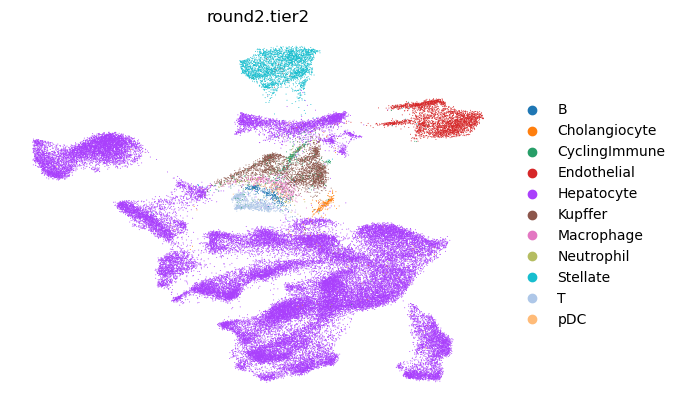

In [4]:
sc.pl.umap(adata, color=["round2.tier2"], frameon=False)

In [5]:
adata.obs["round2.tier2"].value_counts()

round2.tier2
Hepatocyte       50821
Endothelial       3032
Stellate          2856
Kupffer           2407
T                  769
Macrophage         480
CyclingImmune      421
B                  302
Cholangiocyte      244
Neutrophil         157
pDC                113
Name: count, dtype: int64

/var/folders/s5/wm1n11sn35z51ccfk1fs07qc0000gn/T/ipykernel_41711/398777476.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.8, key_added="leiden_0.8")


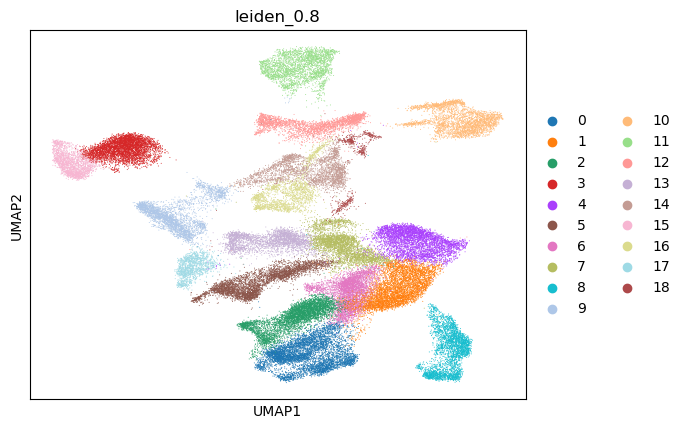

In [6]:
sc.tl.leiden(adata, resolution=0.8, key_added="leiden_0.8")
sc.pl.umap(adata, color=["leiden_0.8"])

In [8]:
sc.tl.rank_genes_groups(adata, groupby="leiden_0.8", method="t-test")

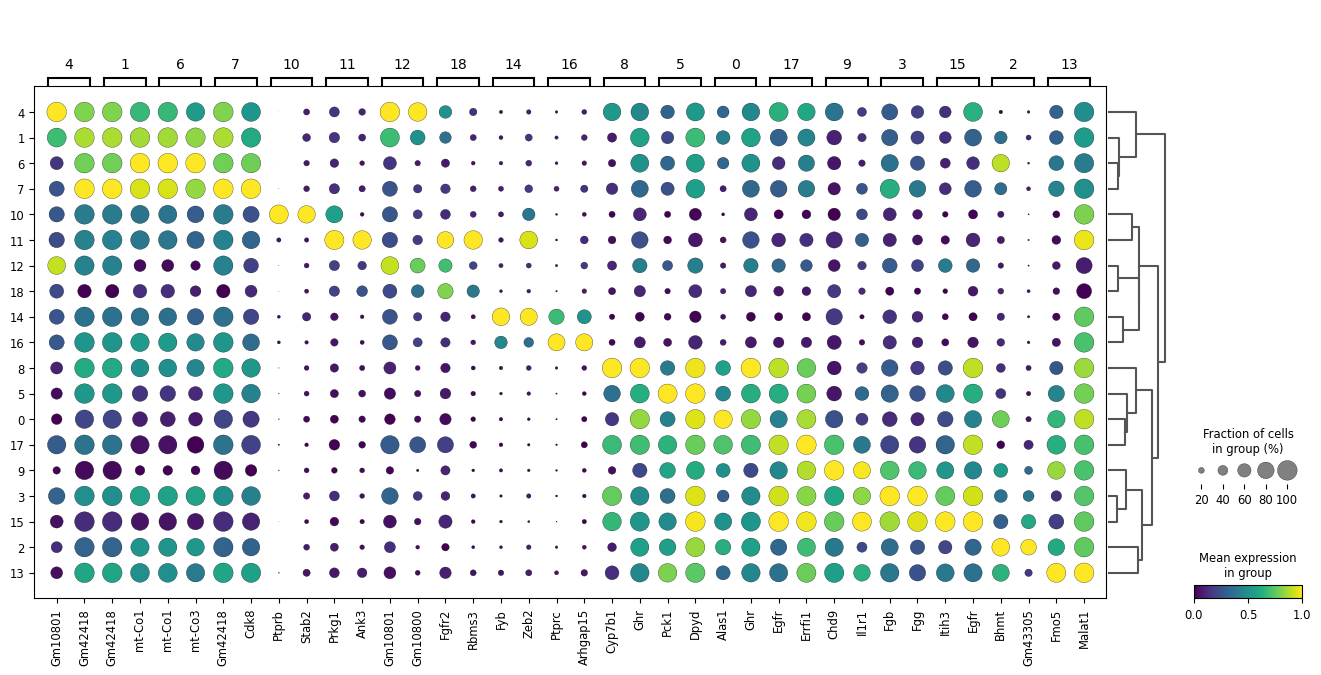

In [9]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden_0.8", n_genes=2, dendrogram=True, standard_scale="var", cmap="viridis")